# 🧩 Reto 4 – Integración de resultados
**Objetivo:** combinar resultados parciales en un diagnóstico integral por sitio.

### Pasos
1. Carga `resultado_temperatura.csv`, `resultado_ph.csv`, `resultado_oxigeno.csv`.
2. Únelos por `sitio` usando `merge`.
3. Crea `diagnostico_final` con reglas (parcial/total/normal).
4. Exporta `diagnostico_final.csv`.
5. Cuenta categorías con `value_counts()`.

> **Reto adicional:** gráfico de barras de distribución.

In [17]:
# --- Paso 1: Importar librerías ---
import pandas as pd

# --- Paso 2: Cargar los tres resultados ---
temp = pd.read_csv("data/resultado_temperatura.csv")
ph = pd.read_csv("data/resultado_ph.csv")
ox = pd.read_csv("data/resultado_oxigeno.csv")

# --- Paso 3: Unir los tres archivos por la columna 'sitio' ---
df = temp.merge(ph, on="sitio").merge(ox, on="sitio")

# --- Paso 4: Crear la función de diagnóstico final ---
def Diagnostico_final(row):
    # Si hay algún tipo de riesgo químico, biológico o térmico
    if row["riesgo_termico"] == "Si" or row["alerta_quimica"] == "Revisar" or row["riesgo_biologico"] == "riesgo":
        return "Parcial"
    
    # Si no hay riesgos en ninguna categoría
    elif row["riesgo_termico"] == "No" and row["alerta_quimica"] != "Revisar" and row["riesgo_biologico"] == "sin riesgo":
        return "Normal"
    
    # En cualquier otro caso
    else:
        return "Total"

# --- Paso 5: Aplicar la función al DataFrame ---
df["diagnostico_final"] = df.apply(Diagnostico_final, axis=1)


In [18]:
# --- Paso 6: Exportar el resultado a un nuevo archivo CSV ---
df.to_csv("data/diagnostico_final.csv", index=False)

In [19]:
print("Diagnóstico final generado con éxito")
print(df.head())

Diagnóstico final generado con éxito
                           sitio  temperatura categoria_temp riesgo_termico  \
0    Quebrada Honda (Facatativá)         19.4         Optima             No   
1                    Río Villeta         28.3           Alta             Si   
2  Quebrada Cune (San Francisco)         25.2           Alta             Si   
3        Río Guayuriba (La Mesa)         30.5           Alta             Si   

    pH clasificacion_pH alerta_quimica  oxigeno nivel_oxigeno  \
0  6.3            Ácido        Revisar      6.2         Medio   
1  8.7           Básico        Revisar      6.1         Medio   
2  6.0            Ácido        Revisar      4.5         Medio   
3  5.9            Ácido        Revisar      4.8         Medio   

  riesgo_biologico diagnostico_final  
0       sin riesgo           Parcial  
1       sin riesgo           Parcial  
2           riesgo           Parcial  
3           riesgo           Parcial  



Conteo de categorías:
diagnostico_final
Parcial    4
Name: count, dtype: int64


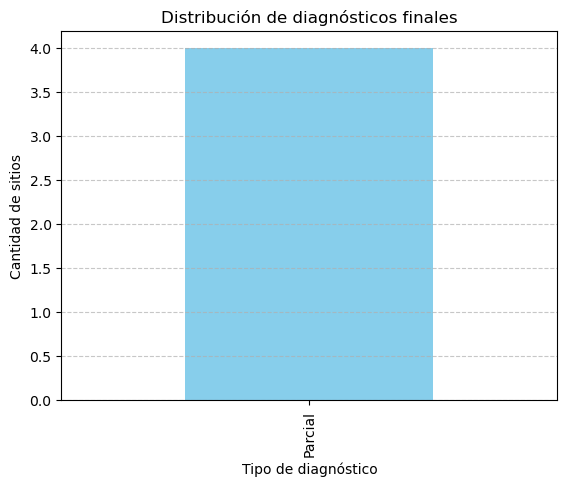


--- CONCLUSIÓN ---
La mayoría de los sitios presentan un diagnóstico 'Parcial', lo que indica que existen alertas o riesgos en al menos una de las variables analizadas.
Se recomienda revisar los parámetros de temperatura, pH y oxígeno para mejorar la calidad ambiental general.


In [24]:
# --- Paso 8 (Reto adicional): Contar categorías ---
conteo = df["diagnostico_final"].value_counts()
print("\nConteo de categorías:")
print(conteo)

# --- Paso 9 (Reto adicional): Gráfico de barras ---
conteo.plot(kind="bar", title="Distribución de diagnósticos finales", color=["skyblue"])
plt.xlabel("Tipo de diagnóstico")
plt.ylabel("Cantidad de sitios")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- Paso 9: Conclusión ---
print("\n--- CONCLUSIÓN ---")
print("La mayoría de los sitios presentan un diagnóstico 'Parcial', lo que indica que existen alertas o riesgos en al menos una de las variables analizadas.")
print("Se recomienda revisar los parámetros de temperatura, pH y oxígeno para mejorar la calidad ambiental general.")